In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('../csvki/ToxinsbaseClass.csv')
dataset.shape


(137, 23)

In [4]:
dataset.describe()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,51.104677,14.813468,17.987591,1.486715,6.429927,22.183212,20.775912,0.987226,0.005693,0.088102,...,0.558226,0.205036,0.156095,0.199876,0.048482,0.028036,3.941606,0.780657,1.350766,1.832117
std,6.051893,10.720521,27.797015,1.258167,4.819238,3.102930,3.143774,1.117894,0.006159,0.109649,...,1.903642,0.507328,0.513956,0.574369,0.209486,0.124335,1.625922,0.394969,2.849080,0.800453
min,36.755550,-25.788917,1.000000,0.160000,0.700000,9.000000,8.700000,0.040000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,47.350792,10.983188,4.500000,0.650000,3.000000,20.300000,18.900000,0.350000,0.000000,0.030000,...,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,3.000000,0.530000,0.033000,1.000000
50%,52.413611,16.698806,9.000000,1.050000,5.000000,22.000000,20.400000,0.550000,0.010000,0.060000,...,0.000000,0.000000,0.007000,0.017000,0.000000,0.000000,4.000000,0.880000,0.189000,2.000000
75%,54.591528,21.592222,23.000000,1.800000,9.000000,23.900000,22.300000,1.230000,0.010000,0.090000,...,0.086000,0.119000,0.047000,0.098000,0.004000,0.004000,5.000000,1.060000,0.901000,2.000000
max,62.239189,32.832500,251.000000,6.200000,30.000000,31.400000,31.200000,8.800000,0.030000,0.870000,...,14.892000,3.309000,3.166000,3.968000,2.007000,1.333000,7.000000,1.440000,17.189000,3.000000


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [17]:
explained_varience = lda.explained_variance_ratio_
explained_varience

array([0.8174417, 0.1825583])

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 1, 1, 2, 3, 2, 3, 1,
       3, 1, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 3, 3, 2, 1],
      dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  1,  1],
       [ 3,  9,  1],
       [ 1,  1,  7]], dtype=int64)

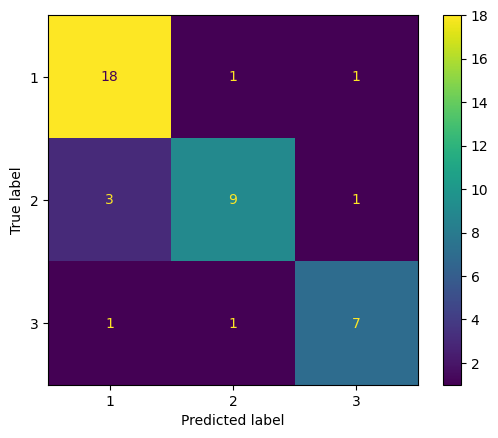

In [21]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
cm_display.plot()
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8095238095238095

In [23]:
y_pred = classifier.predict(X_train)
y_pred

array([3, 3, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 2, 2, 2, 1,
       3, 3, 2, 2, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 3, 1, 1, 3, 3, 3, 2, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 3, 3,
       3, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 1, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 1], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matric = confusion_matrix(y_train, y_pred)
confusion_matric

array([[33,  4,  0],
       [ 3, 30,  0],
       [ 0,  0, 25]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9263157894736842

C:\Users\sulgard\AppData\Local\Temp\ipykernel_12280\312178708.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


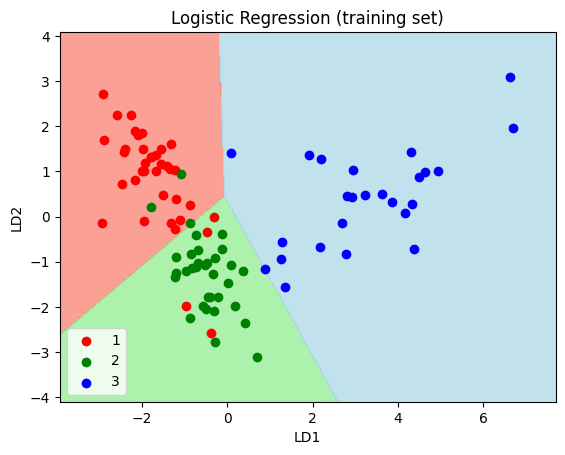

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha=0.75, cmap = ListedColormap(('salmon', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


C:\Users\sulgard\AppData\Local\Temp\ipykernel_12280\1451985418.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


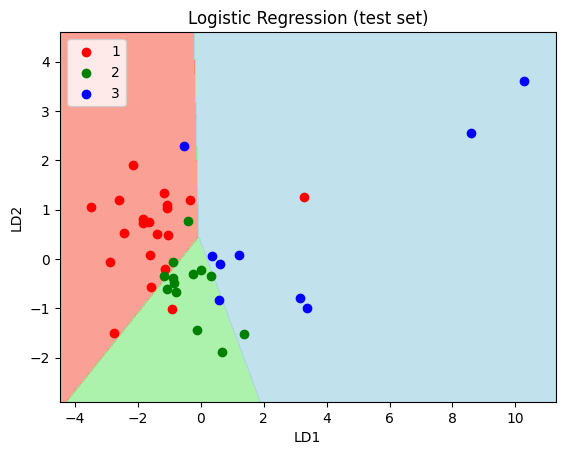

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha=0.75, cmap = ListedColormap(('salmon', 'lightgreen', 'lightblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()